## Iris Flowers Dataset:
### Problem:
The Iris Flowers Dataset involves predicting the flower species given measurements of iris flowers.

It is a multi-class classification problem. The number of observations for each class is balanced. There are 150 observations with 4 input variables and 1 output variable. 

The variable names are as follows:
1)Sepal length in cm 2)Sepal width in cm 3)Petal length in cm 4)Petal width in cm.

5)Class (Iris Setosa, Iris Versicolour, Iris Virginica).

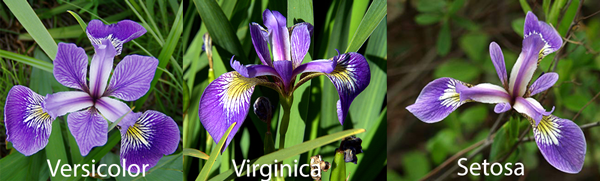

In [2]:
Image(filename="C:\Users\SHIVAPRASAD\Desktop\image\irises.png",width=600,height=700)

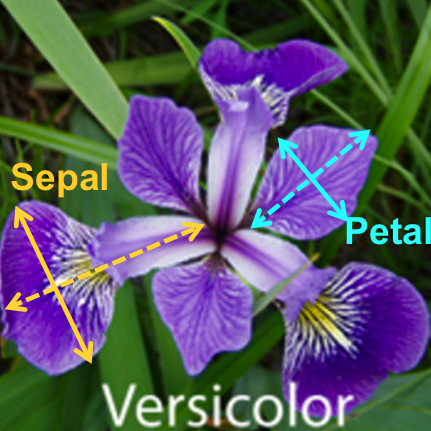

In [3]:
Image(filename="C:\Users\SHIVAPRASAD\Desktop\image\icon_iris.png",width=250,height=100)

## Import the Libraries

In [2]:
#load the libraries
from pandas import read_csv
from pandas.tools.plotting import scatter_matrix
from pandas.plotting import scatter_matrix
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from pickle import dump
from pickle import load
from IPython.display import Image
from matplotlib import pyplot as plt
import seaborn as sns

## Load the dataset

In [3]:
# Loading the dataset
filename="C:\Users\SHIVAPRASAD\Desktop\datasets\iris.data.csv"
names = ['Sepal length','Sepal width','Petal length','Petal width','class']
df=read_csv(filename, names=names)

## Summarizing the Dataset

In [4]:
#Shape
print (df.shape)

(150, 5)


In [5]:
#Head
print df.head(10)

   Sepal length  Sepal width  Petal length  Petal width        class
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa
5           5.4          3.9           1.7          0.4  Iris-setosa
6           4.6          3.4           1.4          0.3  Iris-setosa
7           5.0          3.4           1.5          0.2  Iris-setosa
8           4.4          2.9           1.4          0.2  Iris-setosa
9           4.9          3.1           1.5          0.1  Iris-setosa


In [6]:
#Tail
print df.tail(10)

     Sepal length  Sepal width  Petal length  Petal width           class
140           6.7          3.1           5.6          2.4  Iris-virginica
141           6.9          3.1           5.1          2.3  Iris-virginica
142           5.8          2.7           5.1          1.9  Iris-virginica
143           6.8          3.2           5.9          2.3  Iris-virginica
144           6.7          3.3           5.7          2.5  Iris-virginica
145           6.7          3.0           5.2          2.3  Iris-virginica
146           6.3          2.5           5.0          1.9  Iris-virginica
147           6.5          3.0           5.2          2.0  Iris-virginica
148           6.2          3.4           5.4          2.3  Iris-virginica
149           5.9          3.0           5.1          1.8  Iris-virginica


In [7]:
#statistical summary
print (df.describe())

       Sepal length  Sepal width  Petal length  Petal width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


In [8]:
#Dataset types
print df.dtypes

Sepal length    float64
Sepal width     float64
Petal length    float64
Petal width     float64
class            object
dtype: object


## Data Visualization:

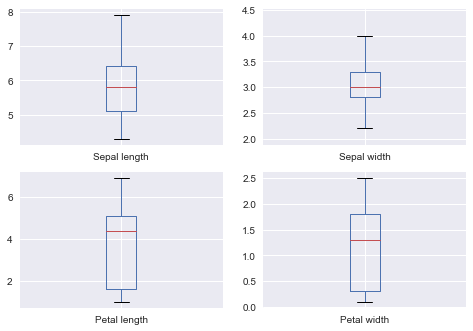

In [9]:
#Box and the whisker plots
df.plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False)
pyplot.show()


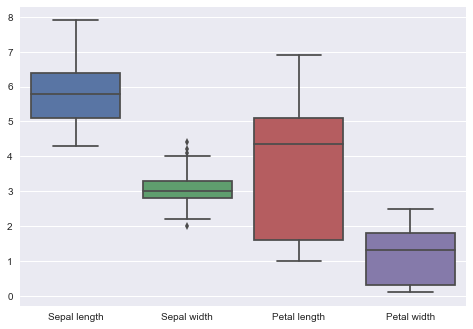

In [11]:
#Another type of plotting box plots
sns.boxplot(df)
plt.show()

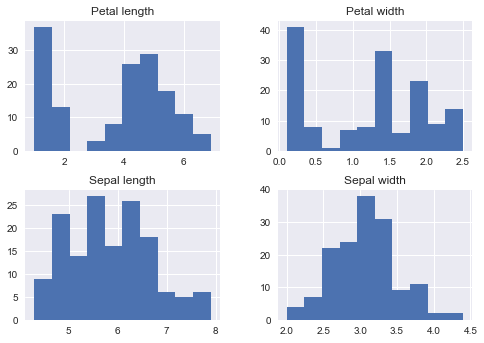

In [12]:
#Histograms
df.hist()
pyplot.show()

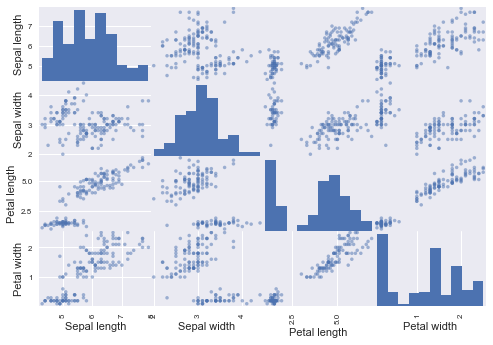

In [24]:
# scatter plot matrix
scatter_matrix(df)
pyplot.show()

## Evaluate Some Algorithms

In [25]:
# Split-out validation dataset
array = df.values
X = array[:,0:4]      
Y = array[:,4]       
validation_size = 0.20    
seed = 7                
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y, test_size=validation_size, random_state=seed)
print X_train.shape
print X_validation.shape
print Y_train.shape
print Y_validation.shape

(120L, 4L)
(30L, 4L)
(120L,)
(30L,)


## Spot Check-Algorithms

In [26]:
# Spot-Check Algorithms
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

# evaluate each model in turn
results = []
names = []
for name, model in models:
	kfold = KFold(n_splits=10, random_state=seed)
	cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)


LR: 0.966667 (0.040825)
LDA: 0.975000 (0.038188)
KNN: 0.983333 (0.033333)
CART: 0.983333 (0.033333)
NB: 0.975000 (0.053359)
SVM: 0.991667 (0.025000)


## Make Predictions

In [19]:
#Make predictions on Validation dataset
SVM = SVC()
SVM.fit(X_train, Y_train)         #fit into the SVM model
predictions = SVM.predict(X_validation)  #to check the predicted output
#print predictions
#print Y_validation
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))


0.933333333333
[[ 7  0  0]
 [ 0 10  2]
 [ 0  0 11]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         7
Iris-versicolor       1.00      0.83      0.91        12
 Iris-virginica       0.85      1.00      0.92        11

    avg / total       0.94      0.93      0.93        30



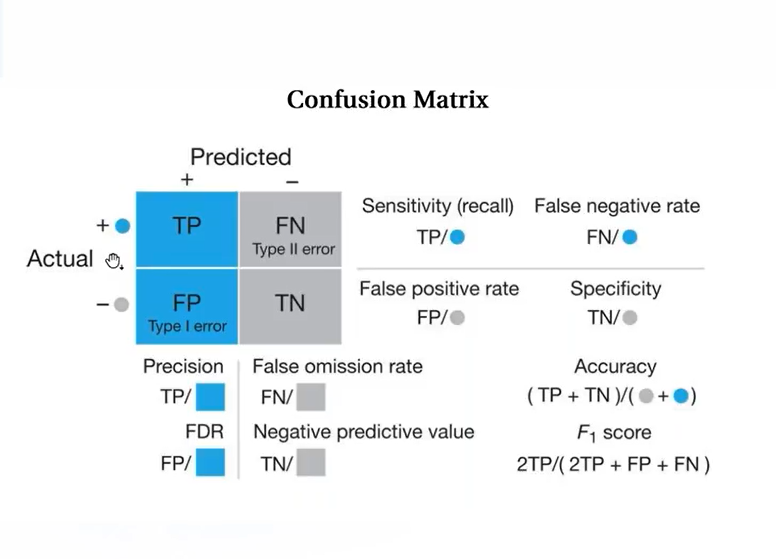

In [30]:
Image(filename="C:\Users\SHIVAPRASAD\Desktop\image\Screenshot (28).png",width=500,height=500)

In [20]:
#finalizing the model
array = df.values
X = array[:,0:4]
Y = array[:,4]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=7)

# Fit the model on 33%
model = SVC()
model.fit(X_train, Y_train)

# save the model to disk
filename = 'finalized_model.sav'
dump(model, open(filename, 'wb')) 

# some time later...

# load the model from disk
loaded_model = load(open(filename, 'rb')) 
result = loaded_model.score(X_test, Y_test)
print"Acuracy =",(result*100)

Acuracy = 96.0
